In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns=1500
pd.options.display.max_rows=1500
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/seeds.csv'

In [3]:
header = ['area','perimeter','compactness','lengthOfKernel',
 'widthOfKernel','asymmetryCoefficient','lengthOfkernelGroove','Variety']
seed = pd.read_csv(url,names=header)

In [4]:
seed.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfkernelGroove,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
mapper = {1:'Kama',2:'Rosa',3:'Canadian'}
seed['Names'] = seed['Variety'].map(mapper)

In [6]:
seed['Names'].value_counts()#index.to_list()

Kama        70
Rosa        70
Canadian    70
Name: Names, dtype: int64

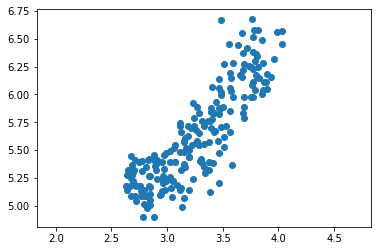

0.8604149377143466


In [7]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign column of grains: width
width = seed.iloc[:,4].values

# Assign column of grains: length
length = seed.iloc[:,3].values
# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)


Great work! As you would expect, the width and length of the grain samples are highly correlated

### Decorrelating the grain measurements with PCA

You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

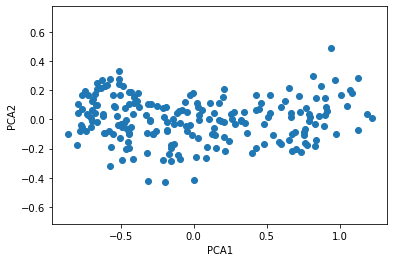

2.5478751053409354e-17


In [8]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
grains = np.vstack((width,length)).T
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

## Intrinsic Dimension

- Intrinsic dimension = number of features needed to
- approximate the dataset
- Essential idea behind dimension reduction
- What is the most compact representation of the samples?
- Can be detected with PCA

## PCA identifies intrinsic dimension

- PCA identies intrinsic dimension when samples have any number of features
- Intrinsic dimension = number of PCA features with signicant variance


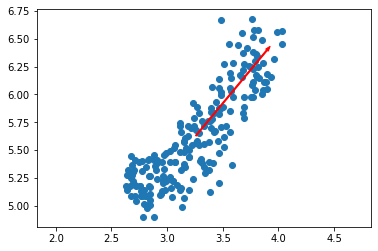

In [9]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [10]:
fish_url = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/fish.csv'

In [11]:
fish = pd.read_csv(fish_url)

In [12]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [13]:
fish['Species'].value_counts()

Bream    34
Roach    20
Pike     17
Smelt    14
Name: Species, dtype: int64

In [14]:
samples = fish.iloc[:,1:].values

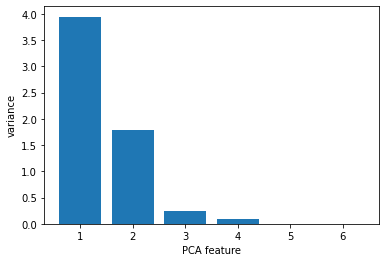

In [15]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler

scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(1,pca.n_components_+1)
plt.bar(features,pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


Great work! It looks like PCA features 0 and 1 have significant variance.

## Dimension reduction with PCA

- Represents same data, using less features
- Important part of machine-learning pipelines
- Can be performed using PCA

### Specify how many features to keep

- Eg PCA(n_components=2)
-  Keeps the rst 2 PCA features
- Intrinsic dimension is a good choice

### Word frequency arrays

 Below is the visual example of <b>sparse</b> matrix.
<img src='https://github.com/iqbalamo93/Datasets/blob/master/Clustering/sparse_Matrix.png?raw=true'>

- Word frequency arrays
- Entries measure presence of each word in each document
- ... measure using "tf-idf"

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)

In [18]:

from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


(85, 2)


### A tf-idf word-frequency array

we'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

we are given a list documents of toy documents about pets. 

In [19]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [20]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


## Clustering Wikipedia part I

Tf-Idf has been performed and is retrived from below url and processed

In [21]:
url = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/wikipedia-vectors.csv'
df = pd.read_csv(url,index_col=0)
d = df.transpose()#columns are documents

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13125 entries, 0 to 13124
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   HTTP 404                                       13125 non-null  float64
 1   Alexa Internet                                 13125 non-null  float64
 2   Internet Explorer                              13125 non-null  float64
 3   HTTP cookie                                    13125 non-null  float64
 4   Google Search                                  13125 non-null  float64
 5   Tumblr                                         13125 non-null  float64
 6   Hypertext Transfer Protocol                    13125 non-null  float64
 7   Social search                                  13125 non-null  float64
 8   Firefox                                        13125 non-null  float64
 9   LinkedIn                                       131

In [23]:
from scipy.sparse.csr import csr_matrix

In [24]:
articles = csr_matrix(d.values)
titles = df.columns.to_list()

In [25]:
#Aim here is to decompose the Tf-Idf Matrics via SVD and apply Kmeans

In [26]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)
print(pipeline)

Pipeline(steps=[('truncatedsvd', TruncatedSVD(n_components=50)),
                ('kmeans', KMeans(n_clusters=6))])


In [27]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


    label                                        article
31      0                              Cristiano Ronaldo
39      0                                  Franck Ribéry
38      0                                         Neymar
37      0                                       Football
36      0              2014 FIFA World Cup qualification
35      0                Colombia national football team
34      0                             Zlatan Ibrahimović
33      0                                 Radamel Falcao
32      0                                   Arsenal F.C.
30      0                  France national football team
22      1                              Denzel Washington
23      1                           Catherine Zeta-Jones
24      1                                   Jessica Biel
25      1                                  Russell Crowe
29      1                               Jennifer Aniston
27      1                                 Dakota Fanning
28      1                      

Fantastic! Take a look at the cluster labels and see if you can identify any patterns!

## Non-negative matrix factorization

- NMF = "non-negative matrix factorization"
- Dimension reduction technique
- NMF models are interpretable (unlike PCA)
- Easy to interpret means easy to explain!

However, all sample features must be non-negative (>= 0)

## NMF applied to Wikipedia articles

In [28]:
print(articles)

  (0, 16)	0.024688249778400003
  (0, 32)	0.0239370711117
  (0, 33)	0.0210896267411
  (0, 137)	0.012295430569100001
  (0, 170)	0.0201970729329
  (0, 176)	0.013691446540099999
  (0, 306)	0.0202448587683
  (0, 384)	0.0300214109746
  (0, 442)	0.0156524310024
  (0, 498)	0.0169308799695
  (0, 504)	0.029291794862900004
  (0, 594)	0.033829482483
  (0, 617)	0.0129978625997
  (0, 689)	0.0132663498394
  (0, 714)	0.0210351304783
  (0, 887)	0.0153774718852
  (0, 953)	0.057097106304
  (0, 965)	0.0241013794769
  (0, 986)	0.0200325761598
  (0, 1089)	0.0174320390598
  (0, 1216)	0.0127849075552
  (0, 1314)	0.0267947689228
  (0, 1418)	0.017119438416
  (0, 1437)	0.0325627503942
  (0, 1497)	0.0350909326779
  :	:
  (59, 12953)	0.010874195498799998
  (59, 12955)	0.0140386753058
  (59, 12969)	0.012038413353799998
  (59, 12979)	0.015129330311200001
  (59, 13016)	0.0190449970264
  (59, 13017)	0.061642595846100004
  (59, 13018)	0.07671349466260001
  (59, 13024)	0.0206058183704
  (59, 13029)	0.0109577430503
  (59

In [29]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))


[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.57]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.49]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.36 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.38 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.47 0.   0.   0.  ]
 [0.   0.01 0.02 0.52 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.44 0.   0.  ]
 [0.   0.   0.   0.5  0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.58 0.   0.  ]
 [0.   0.   0.   0.53 0.01 0.01]
 [0.   0.4

In [30]:
nmf_features.shape

(60, 6)

In [31]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(data=nmf_features,index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc[['Anne Hathaway','Denzel Washington'],:])


                          0         1    2         3    4    5
Anne Hathaway      0.003845  0.000000  0.0  0.575654  0.0  0.0
Denzel Washington  0.000000  0.005601  0.0  0.422339  0.0  0.0


Great work! Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!)

In [32]:
df.head()

,0,1,2,3,4,5
HTTP 404,0.00000,0.0,0.0,0.0,0.0,0.440521
Alexa Internet,0.00000,0.0,0.0,0.0,0.0,0.566677
Internet Explorer,0.00382,0.0,0.0,0.0,0.0,0.398697
HTTP cookie,0.00000,0.0,0.0,0.0,0.0,0.381788
Google Search,0.00000,0.0,0.0,0.0,0.0,0.485579


In [33]:
url_words='https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/wikipedia-vocabulary-utf8.txt'
words=pd.read_csv(url_words,header=None,index_col=None)

In [34]:
words=words.to_numpy().reshape(1,-1).tolist()

In [35]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_,columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3,:]

# Print result of nlargest
print(component.nlargest())


(6, 13125)
film       0.627938
award      0.253156
starred    0.245308
role       0.211472
actress    0.186416
Name: 3, dtype: float64


In [36]:
components_df

aaron   abandon abandoned abandoning abandonment abbas abbey  \
0  0.011376  0.001210  0.000000   0.001739    0.000136   0.0   0.0   
1  0.000000  0.000010  0.005663   0.000000    0.000002   0.0   0.0   
2  0.000000  0.000008  0.000000   0.000000    0.004691   0.0   0.0   
3  0.004149  0.000000  0.003056   0.000000    0.000614   0.0   0.0   
4  0.000000  0.000568  0.004917   0.000000    0.000000   0.0   0.0   
5  0.000138  0.000000  0.008747   0.000000    0.000185   0.0   0.0   

  abbreviated  abbreviation       abc   abdomen abdominal abdul      abel  \
0    0.002463  2.445256e-07  0.000834  0.001190  0.001189   0.0  0.000000   
1    0.000566  5.002569e-04  0.000000  0.000000  0.000000   0.0  0.001583   
2    0.000758  1.604189e-05  0.000000  0.000000  0.000014   0.0  0.000000   
3    0.002436  8.144068e-05  0.003985  0.000000  0.000000   0.0  0.000000   
4    0.000089  4.258812e-05  0.000000  0.005188  0.005514   0.0  0.000009   
5    0.008628  1.530194e-05  0.000000  0.000000  0.000000   0.0  0.000000   

  abilities   ability      able  abnormal abnormalities abnormally aboard  \
0  0.000549  0.000348  0.010128  0.000000      0.000922   0.000000    0.0   
1  0.002219  0.007491  0.004037  0.000000      0.000000   0.000000    0.0   
2  0.000000  0.002791  0.000939  0.000000      0.000000   0.000000    0.0   
3  0.007669  0.005803  0.000914  0.000000      0.000000   0.000000    0.0   
4  0.000582  0.011137  0.006131  0.033338      0.010324   0.005653    0.0   
5  0.000000  0.018330  0.011924  0.000000      0.000000   0.000000    0.0   

  abolish     abolished abolishing abolition aboriginal abortion abraham  \
0     0.0  1.898557e-07        0.0  0.000120   0.000000      0.0     0.0   
1     0.0  3.884117e-04        0.0  0.000459   0.000498      0.0     0.0   
2     0.0  1.245531e-05        0.0  0.004134   0.000000      0.0     0.0   
3     0.0  6.323254e-05        0.0  0.000613   0.000007      0.0     0.0   
4     0.0  3.306646e-05        0.0  0.000038   0.003975      0.0     0.0   
5     0.0  1.188080e-05        0.0  0.000176   0.000000      0.0     0.0   

     abroad    abrupt  abruptly   absence    absent  absolute absolutely  \
0  0.001921  0.000000  0.008512  0.000464  0.000746  0.005638   0.000000   
1  0.002093  0.000000  0.000000  0.000000  0.000985  0.000327   0.000000   
2  0.000000  0.009731  0.007293  0.001206  0.000000  0.000000   0.000053   
3  0.000000  0.000000  0.001943  0.001402  0.000000  0.002144   0.002461   
4  0.000915  0.026206  0.017231  0.021326  0.008408  0.002812   0.000299   
5  0.000000  0.000748  0.000000  0.000266  0.005384  0.005356   0.000000   

     absorb  absorbed absorbing   absorbs absorption  abstract abstraction  \
0  0.000000  0.007238  0.000000  0.000000   0.001685  0.003032         0.0   
1  0.000000  0.000430  0.000000  0.000000   0.000000  0.000000         0.0   
2  0.003375  0.000063  0.001934  0.002111   0.000977  0.000000         0.0   
3  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000         0.0   
4  0.000077  0.003430  0.000044  0.004506   0.040944  0.000000         0.0   
5  0.000000  0.000000  0.000000  0.000378   0.000000  0.000000         0.0   

     absurd  abu abundance  abundant     abuse abused abuses abusive  \
0  0.006115  0.0  0.001201  0.000000  0.005523    0.0    0.0     0.0   
1  0.000014  0.0  0.000000  0.000000  0.000000    0.0    0.0     0.0   
2  0.000000  0.0  0.002554  0.001568  0.000000    0.0    0.0     0.0   
3  0.000626  0.0  0.000000  0.000000  0.008997    0.0    0.0     0.0   
4  0.000000  0.0  0.000714  0.000036  0.005304    0.0    0.0     0.0   
5  0.000000  0.0  0.000000  0.000000  0.000000    0.0    0.0     0.0   

   academia  academic academics academies   academy accelerate accelerated  \
0  0.000000  0.000843       0.0  0.000000  0.000164        0.0    0.001212   
1  0.001409  0.002746       0.0  0.002104  0.008856        0.0    0.000149   
2  0.001954  0.001462       0.0  0.005395  0.000000        0.0    0.007097   
3  0.

In [37]:
component

aaron          0.004149
abandon        0.000000
abandoned      0.003056
abandoning     0.000000
abandonment    0.000614
                 ...   
zimbabwe       0.000000
zinc           0.000000
zone           0.001742
zones          0.006720
zoo            0.000000
Name: 3, Length: 13125, dtype: float64

## Explore the LED digits dataset

In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array samples, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.



In [38]:
digits_url = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/lcd-digits.csv'

In [39]:
da = pd.read_csv(digits_url,header=None,index_col=None)
samples = da.to_numpy()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


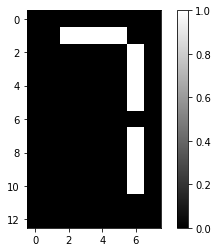

In [40]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


Excellent job! You'll explore this dataset further in the next exercise and see for yourself how NMF can learn the parts of images.

In [41]:
samples

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

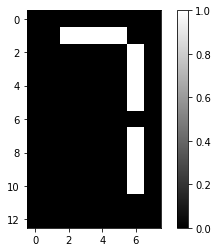

In [43]:
show_as_image(digit)

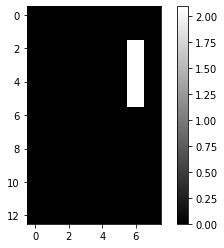

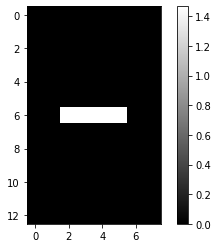

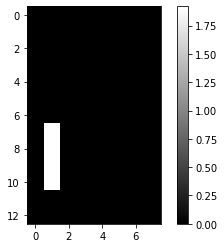

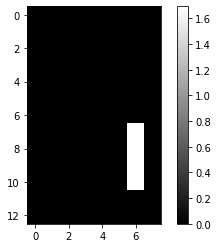

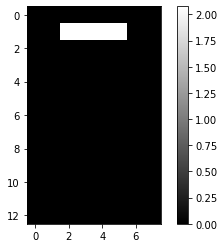

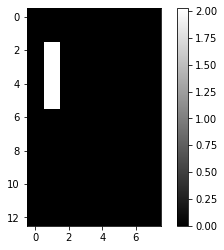

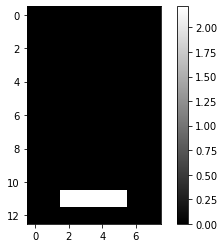

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37562716e-16]


In [44]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0]

# Print digit_features
print(digit_features)

After you are done, take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

### PCA doesn't learn parts
Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples. Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

After submitting the answer, notice that the components of PCA do not represent meaningful parts of images of LED digits!



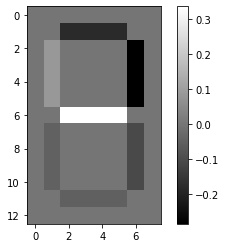

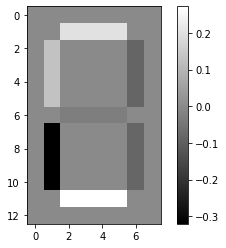

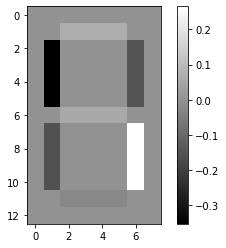

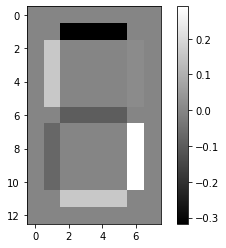

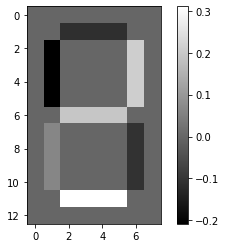

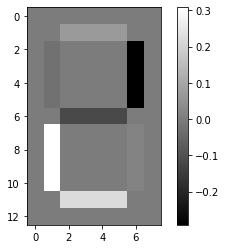

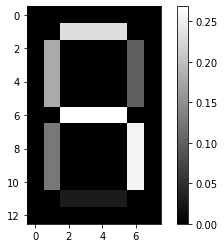

In [45]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    

Great work! Notice that the components of PCA do not represent meaningful parts of images of LED digits!

### Building recommender system using NMF.

#### Finding similar articles

- Engineer at a large online newspaper
- Task :recommend articles similar to article being read by customer
- Similar articles should have similar topics

#### Cosine similarity
- Uses the angle between the lines
- Higher values means more similar
- Maximum value is 1, when angle is 0 degrees

## Which articles are similar to 'Cristiano Ronaldo'?

In [46]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


Great work - although you may need to know a little about football (or soccer, depending on where you're from!) to be able to evaluate for yourself the quality of the computed similarities!

## Recommend musical artists part

In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!



In [47]:
url = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/scrobbler-small-sample.csv'
df = pd.read_csv(url)
artist_url= 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/artists.csv'
artist_names =pd.read_csv(artist_url,header=None)
artist_names = artist_names.values.reshape(-1)

In [48]:
artist_names

array(['Massive Attack', 'Sublime', 'Beastie Boys', 'Neil Young',
       'Dead Kennedys', 'Orbital', 'Miles Davis', 'Leonard Cohen',
       'Van Morrison', 'NOFX', 'Rancid', 'Lamb', 'Korn',
       'Dropkick Murphys', 'Bob Dylan', 'Eminem', 'Nirvana', 'Van Halen',
       'Damien Rice', 'Elvis Costello', 'Everclear', 'Jimi Hendrix',
       'PJ Harvey', 'Red Hot Chili Peppers', 'Ryan Adams', 'Soundgarden',
       'The White Stripes', 'Madonna', 'Eric Clapton', 'Bob Marley',
       'Dr. Dre', 'The Flaming Lips', 'Tom Waits', 'Moby', 'Cypress Hill',
       'Garbage', 'Fear Factory', '50 Cent', 'Ani DiFranco',
       'Matchbox Twenty', 'The Police', 'Eagles', 'Phish',
       'Stone Temple Pilots', 'Black Sabbath', 'Britney Spears',
       'Fatboy Slim', 'System of a Down', 'Simon & Garfunkel',
       'Snoop Dogg', 'Aimee Mann', 'Less Than Jake', 'Rammstein',
       'Reel Big Fish', 'The Prodigy', 'Pantera', 'Foo Fighters',
       'The Beatles', 'Incubus', 'Audioslave', 'Bright Eyes',
       

In [49]:
len(artist_names)

111

In [50]:
print(df)

      user_offset  artist_offset  playcount
0               1             79         58
1               1             84         80
2               1             86        317
3               1             89         64
4               1             96        159
...           ...            ...        ...
2889            0             75        371
2890            0             26         58
2891            0             52         58
2892            0             54         53
2893            0              1        128

[2894 rows x 3 columns]


In [51]:
from scipy.sparse import csr_matrix

data = df['playcount'].values.reshape(-1)#entries give the number of times each artist was listened to by each user
row = df['artist_offset'].values.reshape(-1)#rows correspond to artists 
col = df['user_offset'].values.reshape(-1)#whose columns correspond to users

artists = csr_matrix((data, (row, col)))

print(artists[:1])
print(type(artists))
print(artists.size)
print(artists.shape)

  (0, 2)	105
  (0, 15)	165
  (0, 20)	91
  (0, 21)	98
  (0, 29)	120
  (0, 48)	236
  (0, 70)	67
  (0, 95)	77
  (0, 96)	93
  (0, 109)	98
  (0, 113)	63
  (0, 126)	63
  (0, 127)	429
  (0, 130)	151
  (0, 132)	103
  (0, 152)	83
  (0, 153)	65
  (0, 162)	54
  (0, 181)	456
  (0, 183)	592
  (0, 186)	111
  (0, 193)	158
  (0, 194)	53
  (0, 195)	216
  (0, 201)	89
  (0, 241)	82
  (0, 250)	65
  (0, 267)	51
  (0, 273)	74
  (0, 275)	108
  (0, 276)	68
  (0, 277)	135
  (0, 280)	175
  (0, 295)	77
  (0, 302)	58
  (0, 314)	65
  (0, 322)	56
  (0, 325)	59
  (0, 342)	63
  (0, 343)	99
  (0, 351)	51
  (0, 391)	56
  (0, 400)	55
  (0, 476)	166
<class 'scipy.sparse.csr.csr_matrix'>
2894
(111, 500)


In [52]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import MaxAbsScaler, Normalizer
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


Excellent work - now that you've computed the normalized NMF features, you'll use them in the next exercise to recommend musical artists!

In [53]:
print(norm_features.shape)
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())


(111, 20)
Bruce Springsteen    1.000000
Neil Young           0.957025
Van Morrison         0.874769
Bob Dylan            0.863858
Leonard Cohen        0.863014
dtype: float64
